Cargamos la base de datos en formato JSON

In [146]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [147]:
with open('datasets/raw/eval_route_data_formatted.json',"r") as eval_route:
    data_eval_route = json.load(eval_route)

Obtenemos todas las keys de los Route_ID

In [148]:
def obtener_todas_las_claves(objeto_json):
    claves = []
    if isinstance(objeto_json, dict):
        for clave, valor in objeto_json.items():
            claves.append(clave)
    return claves
claves = obtener_todas_las_claves(data_eval_route)
claves = list(set(claves))

In [149]:
print(claves)

['RouteID_80a72dfb-318d-4fbd-b058-ba05fac4dfb1', 'RouteID_01a7b0fc-8a3c-48aa-87d1-b0c39a412ff2', 'RouteID_654b8f6c-5060-4767-99c7-53c0d9814502', 'RouteID_81561eed-594b-41f0-b20d-7c8ff2125317', 'RouteID_b4179856-cd63-4fd2-b905-5fe06821e77f', 'RouteID_1b64d480-ad37-413c-8347-ccfadfa9ebc1', 'RouteID_3dff7699-63ac-4eea-ba83-216e554e4255', 'RouteID_a949ec6d-cae9-4821-99cd-22f23ab1f829', 'RouteID_3bfaa700-07f1-4728-92f8-d354f1b2a049', 'RouteID_40db1de8-b81b-419c-bdb2-c5e9dea9f921', 'RouteID_540800b0-646e-44de-8b05-652c97de009f', 'RouteID_a3be74cf-40db-4be8-bcd7-46c987e1ea97', 'RouteID_cdacf8e6-ff44-4c13-8dfd-996ad68abe44', 'RouteID_94d3e664-849a-4b46-a996-b6a83339696c', 'RouteID_74a42b3b-33cc-4d02-9eed-75b72fdf02ac', 'RouteID_14b0abef-8892-41e6-bc52-bd296681a5fb', 'RouteID_ce463872-5c50-456c-ae50-48e566c69592', 'RouteID_5b307bb7-bcbb-4cd7-a19b-dea799233ba4', 'RouteID_1d62eb0b-5e19-4bc8-9647-b61c6fb80b58', 'RouteID_a8fe15c2-e615-442a-a4dc-17cc8c7323b9', 'RouteID_f30b4141-ccfa-429e-8248-2bac36

Encontramos todas las keys de las paradas

In [150]:
list_stops=[]
for clave in claves:
    for st in data_eval_route[clave]["stops"]:
        if st not in list_stops:
            list_stops.append(st)

In [151]:
print(list_stops)

['AA', 'AC', 'AD', 'AF', 'AH', 'AO', 'AY', 'BB', 'BC', 'BH', 'BP', 'CD', 'CG', 'CH', 'CP', 'CQ', 'CT', 'DB', 'DG', 'DW', 'EH', 'EJ', 'EK', 'EL', 'EM', 'ER', 'ES', 'ET', 'FF', 'FJ', 'FS', 'GH', 'GJ', 'GN', 'GW', 'HB', 'HE', 'HK', 'HP', 'HX', 'IK', 'IM', 'IS', 'IT', 'IU', 'JF', 'JG', 'JI', 'JJ', 'JK', 'JO', 'JQ', 'JW', 'KE', 'KF', 'KH', 'KM', 'KT', 'KY', 'LF', 'LM', 'LP', 'LV', 'LY', 'MA', 'MG', 'MJ', 'MN', 'NA', 'NB', 'ND', 'NG', 'NL', 'OA', 'OB', 'OT', 'PB', 'PC', 'PH', 'PL', 'PM', 'PO', 'PR', 'PW', 'QA', 'QC', 'QJ', 'QN', 'QY', 'RW', 'RX', 'SA', 'SG', 'SJ', 'SL', 'SN', 'SO', 'SR', 'ST', 'TC', 'TG', 'TI', 'TJ', 'TO', 'TP', 'UA', 'UF', 'UH', 'UL', 'VB', 'VK', 'VM', 'VV', 'VW', 'WB', 'WG', 'WI', 'WO', 'WQ', 'WR', 'WW', 'WX', 'XD', 'XH', 'XI', 'XS', 'XZ', 'YG', 'ZB', 'ZC', 'ZI', 'ZK', 'ZP', 'AK', 'BU', 'BW', 'BY', 'CB', 'CJ', 'CK', 'CR', 'CZ', 'DP', 'DS', 'DX', 'EB', 'EN', 'EO', 'EV', 'EW', 'EY', 'FA', 'FD', 'FN', 'GD', 'GE', 'GI', 'GM', 'GR', 'GU', 'GZ', 'HC', 'HD', 'HN', 'IB', 'IJ', 'JC

Creamos un nuevo JSON donde cada parada es asignada con un tag 0 para inexistente, 1 para Dropoff y 2 para Station. Se elimina el diccionario "stops"

In [152]:
processed = dict([])
for clave in claves:
    toADD = data_eval_route[clave]
    toADD['RouteID'] = str(clave).replace("RouteID_","")
    for stop in list_stops:
        if stop in toADD["stops"]:
            toADD[stop] = "1" if toADD["stops"][stop]['type'] == 'Dropoff' else "2"
            toADD['Zone'] = str(data_eval_route[clave]['stops'][stop]['zone_id']).split('-')[0]
        else:
            toADD[stop] = "0"
        if toADD[stop] == "2" and toADD["stops"][stop]['type'] != "Station":
            print(toADD["stops"][stop]['type']) ##Verificamos si hay valores nulos
            
    del toADD['stops']
    processed[str(len(processed))] = toADD

Escribimos el diccionario resultante

In [153]:
with open('datasets/processed/eval_route_data_formatted.json', 'w') as file:
    json.dump(processed, file, indent=4)

In [154]:
df_eval_route = pd.DataFrame.from_dict(processed, orient='index')

In [155]:
df_eval_route

,station_code,date_YYYY_MM_DD,departure_time_utc,executor_capacity_cm3,RouteID,AA,Zone,AC,AD,AF,...,VG,FZ,AB,DD,NN,UT,OM,AL,FR,HU
0,DLA8,2018-08-27,14:53:19,3313071.00,80a72dfb-318d-4fbd-b058-ba05fac4dfb1,1,G,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,DLA9,2018-06-26,14:41:23,3539605.75,01a7b0fc-8a3c-48aa-87d1-b0c39a412ff2,0,H,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,DLA7,2018-07-08,14:20:01,3539605.75,654b8f6c-5060-4767-99c7-53c0d9814502,0,D,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,DBO1,2018-07-12,14:07:56,4247527.00,81561eed-594b-41f0-b20d-7c8ff2125317,0,G,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,DLA8,2018-09-09,15:04:27,3313071.00,b4179856-cd63-4fd2-b905-5fe06821e77f,0,H,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,DAU1,2018-09-17,15:07:30,4247527.00,a0a868ad-d9fa-4583-b162-76f8815fbced,0,E,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3048,DLA8,2018-07-05,16:11:26,3539605.75,de620553-8946-4c5a-92d4-805ed8de4073,0,D,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3049,DLA5,2018-09-28,14:24:54,4247527.00,e7c96b3c-13fa-4972-ac89-99ed6cf73281,0,C,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3050,DCH4,2018-09-02,13:24:05,4247527.00,3d295571-a2e8-4ca4-b9e1-d3833ae35fed,0,C,1,0,0,...,0,1,0,0,1,0,0,0,0,0


In [156]:
df_eval_route.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3052 entries, 0 to 3051
Columns: 681 entries, station_code to HU
dtypes: float64(1), object(680)
memory usage: 15.9+ MB


In [157]:
df_eval_route_categorical = df_eval_route.columns.tolist()

In [158]:
df_eval_route.describe()

,executor_capacity_cm3
count,3.052000e+03
mean,3.670335e+06
std,4.860622e+05
min,3.114853e+06
25%,3.313071e+06
50%,3.539606e+06
75%,4.247527e+06
max,4.672280e+06


In [159]:
df_eval_route_categorical.remove('executor_capacity_cm3')

In [160]:
df_eval_route_numerical = ["executor_capacity_cm3"]

In [161]:
df_eval_route.count()

station_code             3052
date_YYYY_MM_DD          3052
departure_time_utc       3052
executor_capacity_cm3    3052
RouteID                  3052
                         ... 
UT                       3052
OM                       3052
AL                       3052
FR                       3052
HU                       3052
Length: 681, dtype: int64

In [162]:
for c in df_eval_route_categorical:
  print(c)
  print(df_eval_route[c].unique())
  print(df_eval_route[c].nunique())
  print('\n')

station_code
['DLA8' 'DLA9' 'DLA7' 'DBO1' 'DSE2' 'DLA4' 'DLA3' 'DSE5' 'DLA5' 'DBO3'
 'DCH3' 'DBO2' 'DSE4' 'DCH4' 'DCH2' 'DAU1' 'DCH1' 'DBO6']
18


date_YYYY_MM_DD
['2018-08-27' '2018-06-26' '2018-07-08' '2018-07-12' '2018-09-09'
 '2018-09-24' '2018-09-29' '2018-06-17' '2018-09-13' '2018-07-18'
 '2018-09-01' '2018-09-18' '2018-07-10' '2018-07-16' '2018-06-27'
 '2018-06-22' '2018-07-15' '2018-08-29' '2018-06-25' '2018-06-06'
 '2018-09-17' '2018-07-02' '2018-09-27' '2018-09-22' '2018-09-25'
 '2018-06-23' '2018-09-20' '2018-10-01' '2018-07-11' '2018-09-19'
 '2018-09-14' '2018-07-07' '2018-06-12' '2018-09-06' '2018-06-29'
 '2018-10-02' '2018-09-02' '2018-07-03' '2018-09-28' '2018-06-16'
 '2018-09-30' '2018-06-24' '2018-06-21' '2018-06-03' '2018-09-10'
 '2018-09-05' '2018-06-07' '2018-06-14' '2018-06-10' '2018-09-16'
 '2018-07-06' '2018-06-08' '2018-09-15' '2018-07-17' '2018-07-09'
 '2018-06-04' '2018-07-05' '2018-09-03' '2018-08-28' '2018-09-11'
 '2018-07-13' '2018-09-12' '2018-09-21' '2018

In [163]:
for c in df_eval_route_categorical:
  print(df_eval_route[c].value_counts())
  print('\n')

station_code
DLA9    496
DLA7    397
DLA8    353
DBO3    202
DSE4    166
DCH3    161
DLA4    157
DBO2    152
DSE5    143
DLA3    129
DCH1    123
DAU1    121
DSE2    114
DCH4    113
DLA5     94
DCH2     71
DBO1     59
DBO6      1
Name: count, dtype: int64


date_YYYY_MM_DD
2018-07-03    80
2018-09-29    72
2018-09-15    68
2018-07-05    66
2018-10-02    64
              ..
2018-06-07    20
2018-06-04    19
2018-06-18    19
2018-06-25    15
2018-08-27    15
Name: count, Length: 85, dtype: int64


departure_time_utc
15:00:00    91
15:30:00    69
13:45:00    63
16:15:00    49
16:00:00    48
            ..
15:11:09     1
14:28:40     1
15:27:58     1
14:22:24     1
14:57:09     1
Name: count, Length: 2359, dtype: int64


RouteID
80a72dfb-318d-4fbd-b058-ba05fac4dfb1    1
6c918d59-a93a-4246-9b68-f0c0702b31c1    1
48ae5804-80c4-4d04-af95-36f4984f41af    1
9b8dd597-d70e-48e4-bacd-877bebba0cc3    1
498f6acb-1182-4e68-af6a-5750fbf1f39b    1
                                       ..
b3511451-9eda-

In [164]:
for c in df_eval_route_categorical:
  print(df_eval_route[c].value_counts(normalize=True).mul(100).round(1).astype(str) + '%')
  print('\n')

station_code
DLA9    16.3%
DLA7    13.0%
DLA8    11.6%
DBO3     6.6%
DSE4     5.4%
DCH3     5.3%
DLA4     5.1%
DBO2     5.0%
DSE5     4.7%
DLA3     4.2%
DCH1     4.0%
DAU1     4.0%
DSE2     3.7%
DCH4     3.7%
DLA5     3.1%
DCH2     2.3%
DBO1     1.9%
DBO6     0.0%
Name: proportion, dtype: object


date_YYYY_MM_DD
2018-07-03    2.6%
2018-09-29    2.4%
2018-09-15    2.2%
2018-07-05    2.2%
2018-10-02    2.1%
              ... 
2018-06-07    0.7%
2018-06-04    0.6%
2018-06-18    0.6%
2018-06-25    0.5%
2018-08-27    0.5%
Name: proportion, Length: 85, dtype: object


departure_time_utc
15:00:00    3.0%
15:30:00    2.3%
13:45:00    2.1%
16:15:00    1.6%
16:00:00    1.6%
            ... 
15:11:09    0.0%
14:28:40    0.0%
15:27:58    0.0%
14:22:24    0.0%
14:57:09    0.0%
Name: proportion, Length: 2359, dtype: object


RouteID
80a72dfb-318d-4fbd-b058-ba05fac4dfb1    0.0%
6c918d59-a93a-4246-9b68-f0c0702b31c1    0.0%
48ae5804-80c4-4d04-af95-36f4984f41af    0.0%
9b8dd597-d70e-48e4-bacd-877bebba0

D:\GitHub Repos\Proyecto_Mineria\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\GitHub Repos\Proyecto_Mineria\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\GitHub Repos\Proyecto_Mineria\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\GitHub Repos\Proyecto_Mineria\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

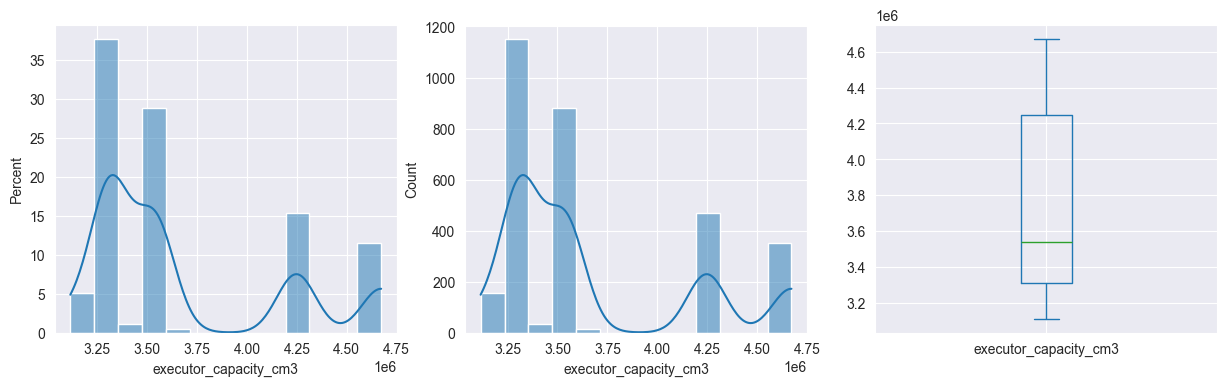

In [165]:
fig, ax1=plt.subplots(len(df_eval_route_numerical),3)
ax2 = ax1.ravel()

for i in list(range(0,len(df_eval_route_numerical)*3,3)):
  j=i+1
  k=j+1
  fig.set_figheight(4)
  fig.set_figwidth(15)
  plt.subplots_adjust(hspace=0.3)
  sns.histplot(df_eval_route[df_eval_route_numerical[i//3]], kde=True, ax=ax2[i],stat='percent')
  sns.histplot(df_eval_route[df_eval_route_numerical[i//3]], kde=True, ax=ax2[j],pmax=1)
  df_eval_route[df_eval_route_numerical[i//3]].plot(kind='box',ax=ax2[k],grid=True)

D:\GitHub Repos\Proyecto_Mineria\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\GitHub Repos\Proyecto_Mineria\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\GitHub Repos\Proyecto_Mineria\venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
D:\GitHub Repos\Proyecto_Mineria\venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

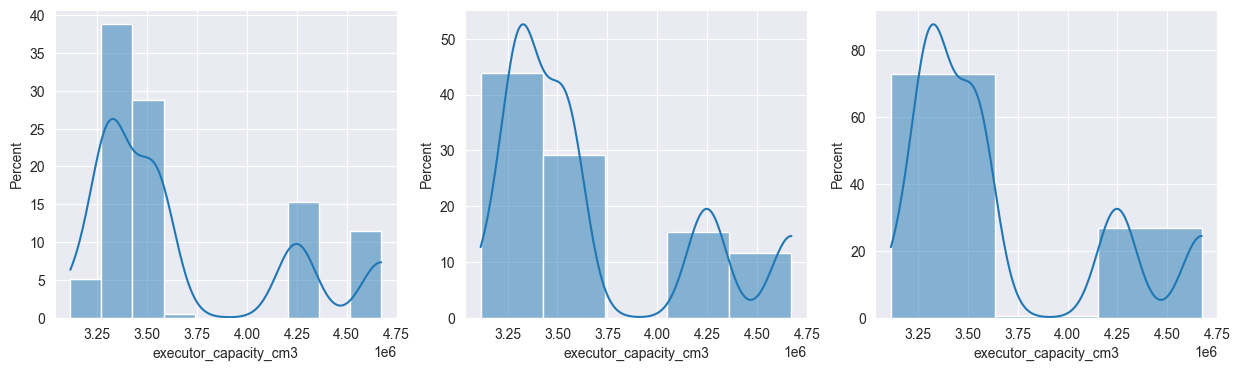

In [166]:
fig, ax1=plt.subplots(len(df_eval_route_numerical),3)
ax2 = ax1.ravel()
for i in list(range(0,len(df_eval_route_numerical)*3,3)):
  j=i+1
  k=j+1
  fig.set_figheight(4)
  fig.set_figwidth(15)
  plt.subplots_adjust(hspace=0.3)
  sns.histplot(df_eval_route[df_eval_route_numerical[i//3]], kde=True, ax=ax2[i],stat='percent',bins=10)
  sns.histplot(df_eval_route[df_eval_route_numerical[i//3]], kde=True, ax=ax2[j],stat='percent', bins=5)
  sns.histplot(df_eval_route[df_eval_route_numerical[i//3]], kde=True, ax=ax2[k],stat='percent', bins=3)

In [167]:
with open('datasets/raw/eval_package_data_formatted.json',"r") as eval_package:
    data_eval_package = json.load(eval_package)

In [168]:
claves_package = obtener_todas_las_claves(data_eval_package)
claves_package = list(set(claves_package))
print(claves_package)

['RouteID_80a72dfb-318d-4fbd-b058-ba05fac4dfb1', 'RouteID_01a7b0fc-8a3c-48aa-87d1-b0c39a412ff2', 'RouteID_654b8f6c-5060-4767-99c7-53c0d9814502', 'RouteID_81561eed-594b-41f0-b20d-7c8ff2125317', 'RouteID_b4179856-cd63-4fd2-b905-5fe06821e77f', 'RouteID_1b64d480-ad37-413c-8347-ccfadfa9ebc1', 'RouteID_3dff7699-63ac-4eea-ba83-216e554e4255', 'RouteID_a949ec6d-cae9-4821-99cd-22f23ab1f829', 'RouteID_3bfaa700-07f1-4728-92f8-d354f1b2a049', 'RouteID_40db1de8-b81b-419c-bdb2-c5e9dea9f921', 'RouteID_540800b0-646e-44de-8b05-652c97de009f', 'RouteID_a3be74cf-40db-4be8-bcd7-46c987e1ea97', 'RouteID_cdacf8e6-ff44-4c13-8dfd-996ad68abe44', 'RouteID_94d3e664-849a-4b46-a996-b6a83339696c', 'RouteID_74a42b3b-33cc-4d02-9eed-75b72fdf02ac', 'RouteID_14b0abef-8892-41e6-bc52-bd296681a5fb', 'RouteID_ce463872-5c50-456c-ae50-48e566c69592', 'RouteID_5b307bb7-bcbb-4cd7-a19b-dea799233ba4', 'RouteID_1d62eb0b-5e19-4bc8-9647-b61c6fb80b58', 'RouteID_a8fe15c2-e615-442a-a4dc-17cc8c7323b9', 'RouteID_f30b4141-ccfa-429e-8248-2bac36

In [169]:
processed = dict([])
for clave in claves_package:
    ruta = data_eval_package[clave]
    claves_paradas = obtener_todas_las_claves(ruta)
    for parada in claves_paradas:
        claves_paquetes = obtener_todas_las_claves(ruta[parada])
        toADD = dict([])
        for paquete in claves_paquetes:
            toADD['RouteID'] = str(clave).replace("RouteID_","")
            toADD['stop'] = str(parada)
            toADD['PackageID'] = str(paquete).replace("PackageID_","")
            toADD['start_time'] = str(ruta[parada][paquete]['time_window']['start_time_utc'])
            toADD['end_time'] = str(ruta[parada][paquete]['time_window']['end_time_utc'])
            toADD['planned_service_time_seconds'] = str(ruta[parada][paquete]['planned_service_time_seconds'])
            toADD['depth_cm'] = str(ruta[parada][paquete]['dimensions']['depth_cm'])
            toADD['height_cm'] = str(ruta[parada][paquete]['dimensions']['height_cm'])
            toADD['width_cm'] = str(ruta[parada][paquete]['dimensions']['width_cm'])
            processed[str(len(processed))] = toADD
            toADD = dict([])
            
print(processed)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [170]:
with open('datasets/processed/eval_package_data_formatted.json', 'w') as file:
    json.dump(processed, file, indent=4)

In [171]:
df_eval_package = pd.DataFrame.from_dict(processed, orient='index')

In [172]:
df_eval_package.head()

,RouteID,stop,PackageID,start_time,end_time,planned_service_time_seconds,depth_cm,height_cm,width_cm
0,80a72dfb-318d-4fbd-b058-ba05fac4dfb1,AA,ae8f6a99-2013-4c45-bf50-358c95d030a7,None,None,51.0,39.4,7.6,31.8
1,80a72dfb-318d-4fbd-b058-ba05fac4dfb1,AA,b71f318e-3009-4861-aeee-93f2e7f70529,None,None,51.0,50.8,30.5,35.6
2,80a72dfb-318d-4fbd-b058-ba05fac4dfb1,AC,8f0ae201-a7df-46b9-b59c-ae987b200e56,None,None,43.5,39.4,7.6,31.8
3,80a72dfb-318d-4fbd-b058-ba05fac4dfb1,AC,572f9f5b-988e-4ed4-bc4e-c88cf3857caa,None,None,43.5,33.0,20.3,26.7
4,80a72dfb-318d-4fbd-b058-ba05fac4dfb1,AD,8174f828-6d34-4d0b-bbd8-42904a01b879,None,None,26.0,32.3,0.8,29.7


In [ ]:
with open('datasets/raw/eval_travel_times_formatted.json', "r") as eval_travel_times:
    data_eval_travel_times = json.load(eval_travel_times)
claves_eval_travel_times = obtener_todas_las_claves(data_eval_package)
claves_eval_travel_times = list(set(claves_eval_travel_times))
print(claves_eval_travel_times)

In [172]:
processed = dict([])
for clave in claves_eval_travel_times:
    ruta = claves_eval_travel_times[clave]
    claves_paradas = obtener_todas_las_claves(ruta)
    for parada in claves_paradas:
        claves_llegadas = obtener_todas_las_claves(ruta[parada])
        toADD = dict([])
        for llegada in claves_llegadas:
            toADD['RouteID'] = str(clave).replace("RouteID_","")
            toADD['salida'] = str(parada)
            toADD['llegada'] = str(llegada)
            toADD['travel_time'] = str(ruta[parada][paquete])
            processed[str(len(processed))] = toADD
            toADD = dict([])
            
print(processed)